In [1]:
#Import the neccessary Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the data as a dataframe
CompressiveStrength = pd.read_csv('concrete.csv')

In [3]:
#Shape of the data
CompressiveStrength.shape

(1030, 9)

In [4]:
#Data Type of each attribute:Method 1
CompressiveStrength.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
#Checking the presence of null values
CompressiveStrength.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
#Look of the data
CompressiveStrength.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
#5 Point Summary or descriptive statistics
CompressiveStrength.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Observations from 5 point summary

1. There are no negative values, missing values present in the data set
2. 5 point summary table is observed for all the columns
3. 'Mean' and 'Median' are not similar for the columns such as 'slag', 'cement', 'ash', 'age' and this observation confirms the presence of long tails across the distribution

## Univariate Analysis

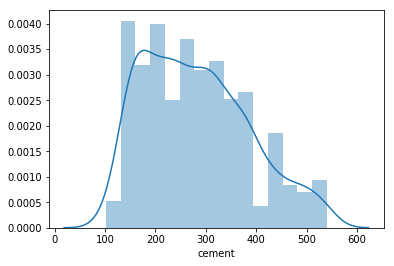

In [8]:
#Histogram for 'cement' column
sns.distplot(CompressiveStrength['cement'])

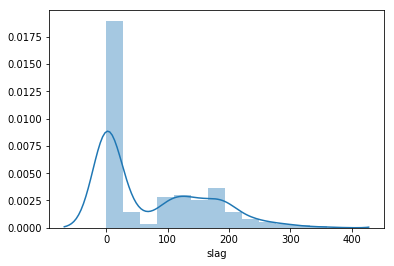

In [9]:
#Histogram for 'slag' column
sns.distplot(CompressiveStrength['slag'])

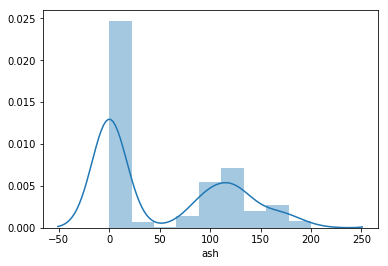

In [10]:
#Histogram for 'ash' column
sns.distplot(CompressiveStrength['ash'])

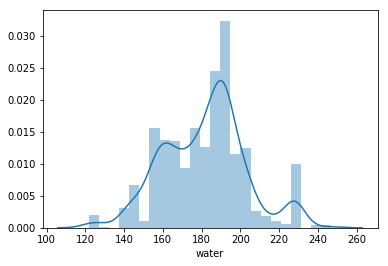

In [11]:
#Histogram for 'water' column
sns.distplot(CompressiveStrength['water'])

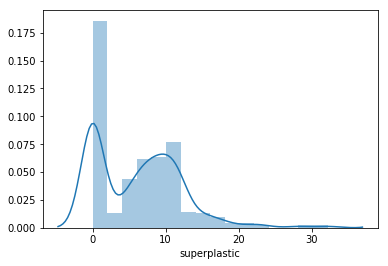

In [12]:
#Histogram for 'superplastic' column
sns.distplot(CompressiveStrength['superplastic'])

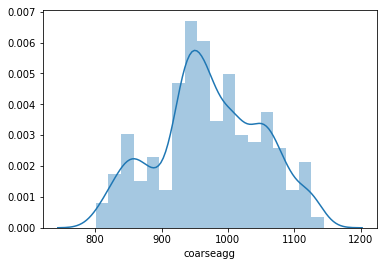

In [13]:
#Histogram for 'coarseagg' column
sns.distplot(CompressiveStrength['coarseagg'])

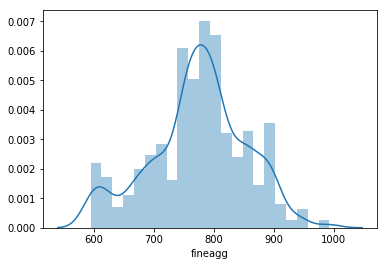

In [14]:
#Histogram for 'fineagg' column
sns.distplot(CompressiveStrength['fineagg'])

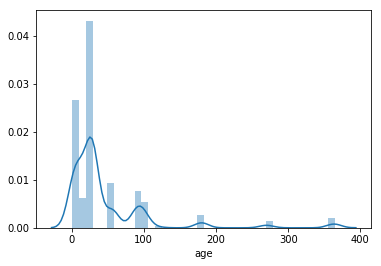

In [15]:
#Histogram for 'age' column
sns.distplot(CompressiveStrength['age'])

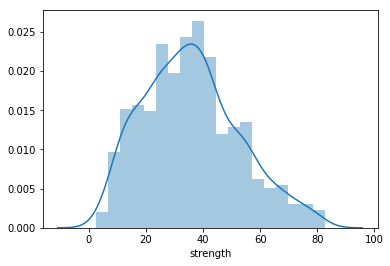

In [16]:
#Histogram for 'strength' column
sns.distplot(CompressiveStrength['strength'])

# Observations from Univariate analysis

1. Columns such as 'strength', 'fineagg', 'coarseagg', 'cement' seem to have a normal distribution however with the presence of tails
2. Columns such as 'age', 'superplastic', 'ash' and 'slag' have a mix of gaussians/multiple peaks and valleys
3. More information on the presence of outliers can be observed in the box plots

## Outlier Detection  

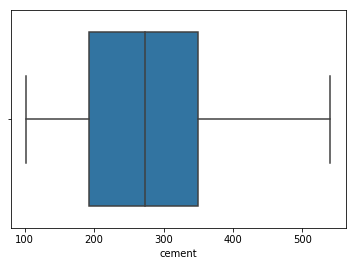

In [17]:
#To check the presence of outliers in 'cement'
sns.boxplot(CompressiveStrength['cement'])

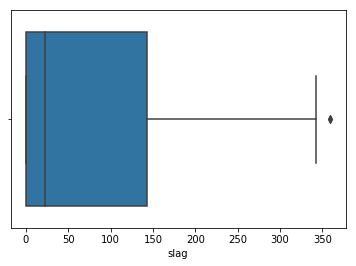

In [18]:
#To check the presence of outliers in 'slag'
sns.boxplot(CompressiveStrength['slag'])

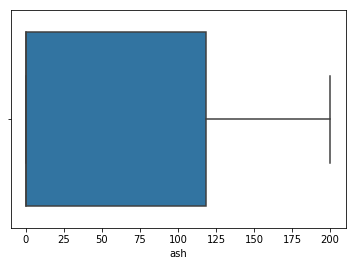

In [19]:
#To check the presence of outliers in 'ash'
sns.boxplot(CompressiveStrength['ash'])

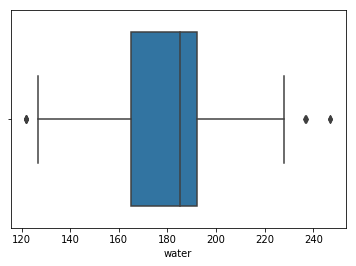

In [20]:
#To check the presence of outliers in 'water'
sns.boxplot(CompressiveStrength['water'])

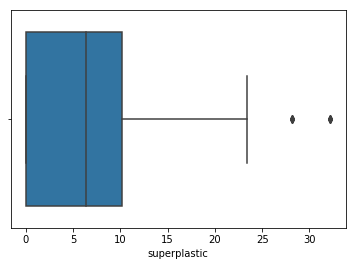

In [21]:
#To check the presence of outliers in 'superplastic'
sns.boxplot(CompressiveStrength['superplastic'])

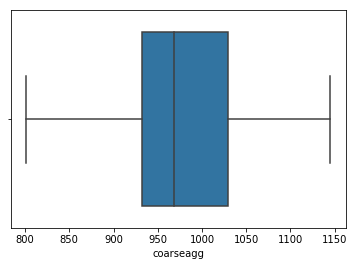

In [22]:
#To check the presence of outliers in 'coarseagg'
sns.boxplot(CompressiveStrength['coarseagg'])

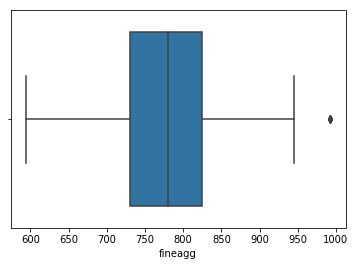

In [23]:
#To check the presence of outliers in 'fineagg'
sns.boxplot(CompressiveStrength['fineagg'])

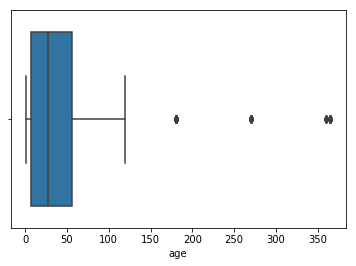

In [24]:
#To check the presence of outliers in 'age'
sns.boxplot(CompressiveStrength['age'])

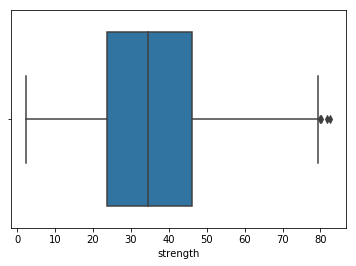

In [25]:
#To check the presence of outliers in 'strength'
sns.boxplot(CompressiveStrength['strength'])

## Observations from Outlier Detection

1. There are no outliers present in 'fineagg', 'coarseagg' and 'cement' columns from the bopxplot charts
2. Huge number of outliers present in 'age', 'superplastic' and 'water' columns
3. Outliers need to be removed using IQR technique

## Bivariate Analysis

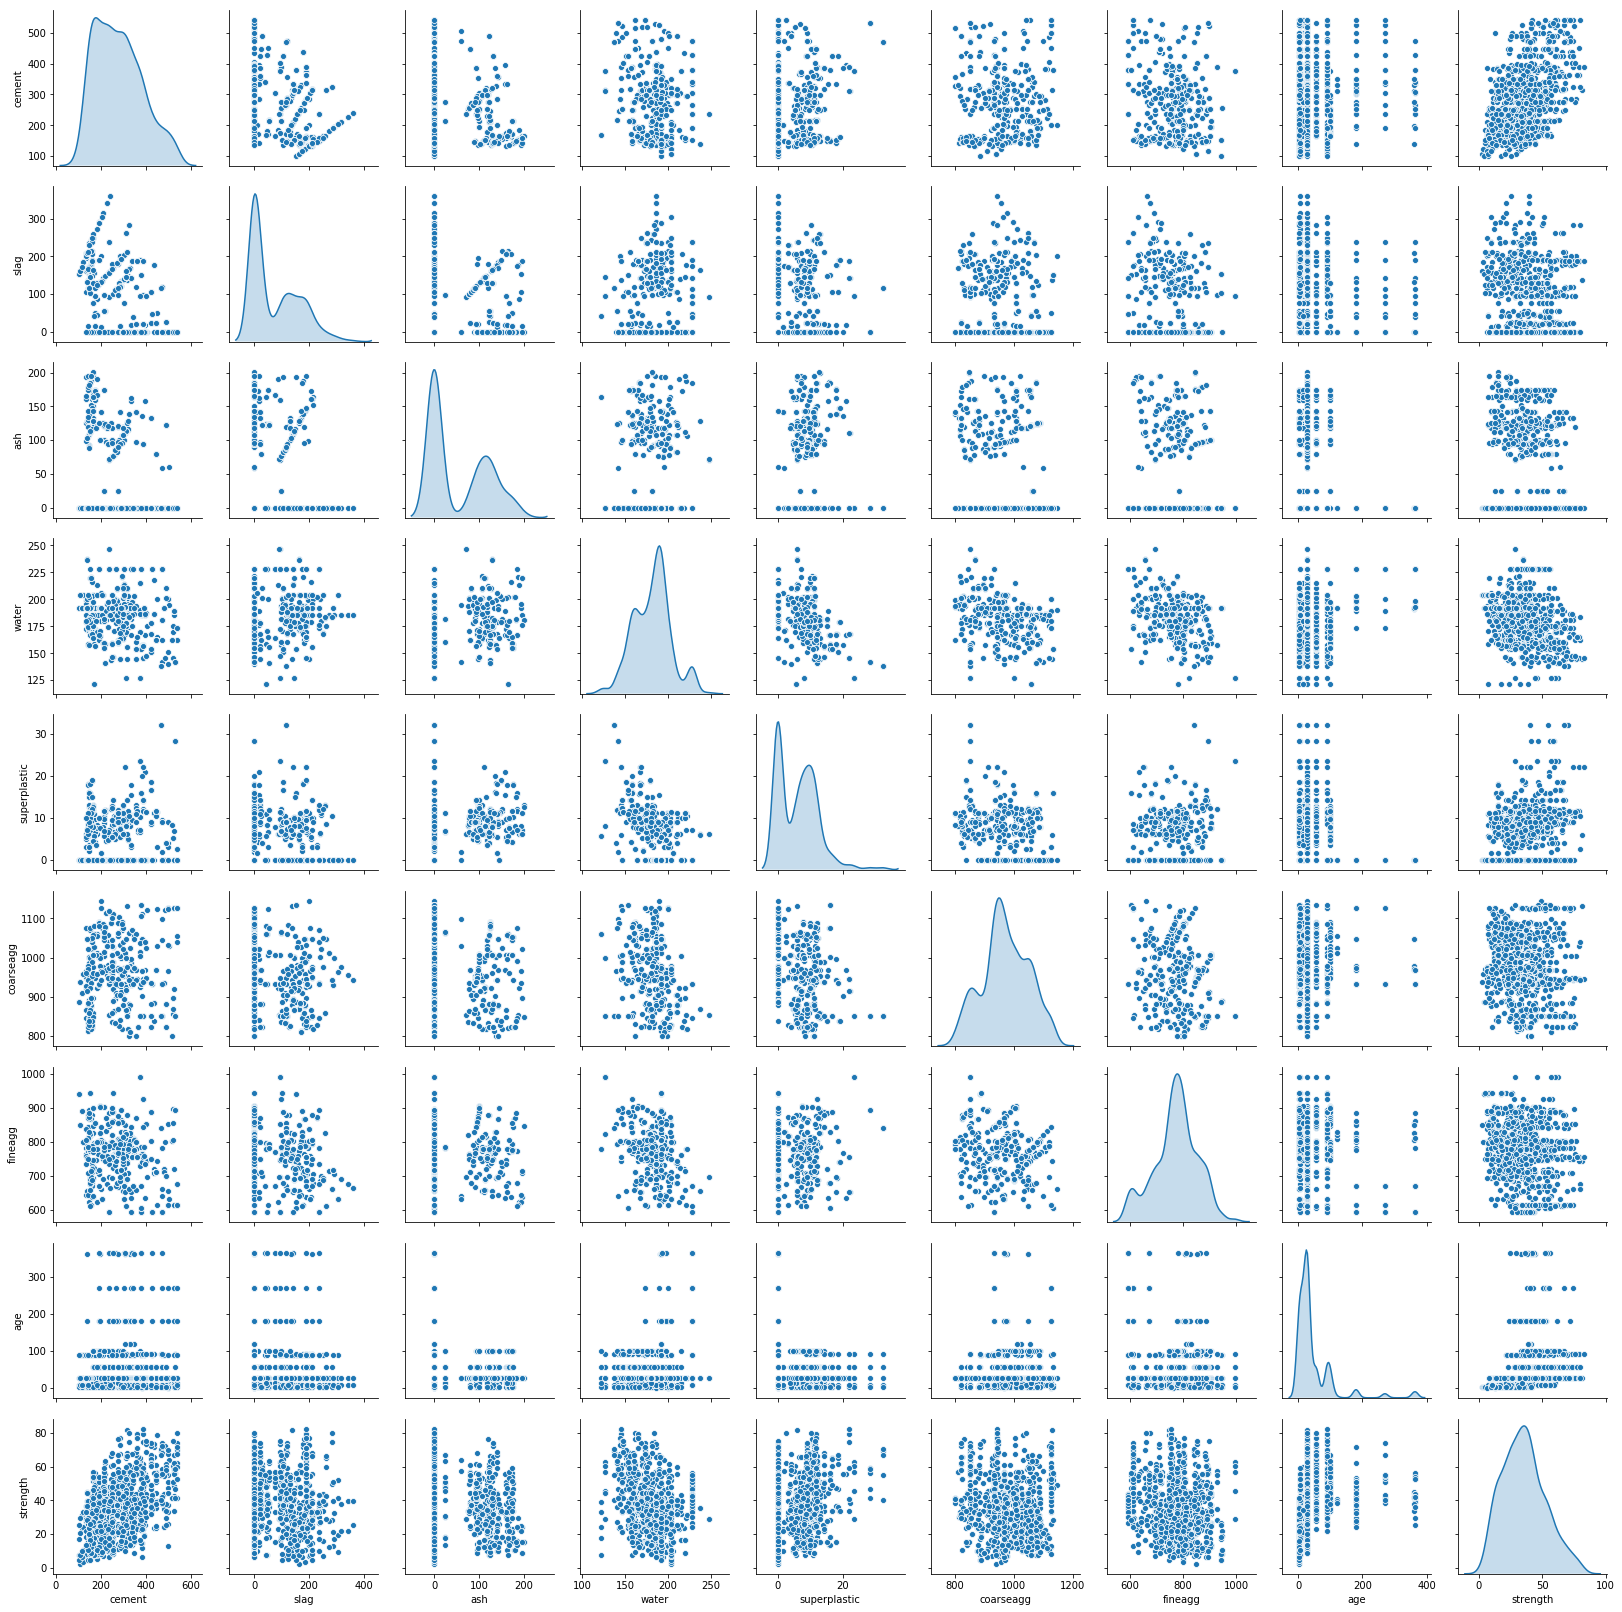

In [26]:
#Data Distribution across columns
sns.pairplot(CompressiveStrength, diag_kind='kde')

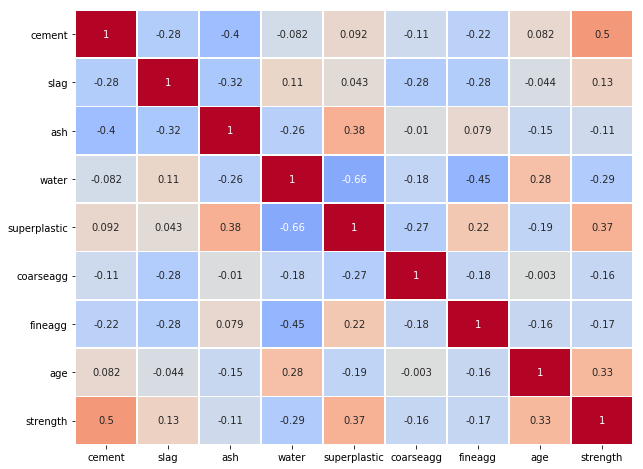

In [27]:
#To get the correlation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(CompressiveStrength.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap='coolwarm',
            robust=True
            )
plt.show()

## Observations from Bivariate analysis

1. There are no linear relationships observed between the columns and the target column 'strength'
2. There are presence of outliers observed in columns such as 'strength', 'age', 'superplastic', 'water','ash'
3. There are multiple peaks/gaussians observed in the columns such as 'ash' , 'water' and 'superplastic'

## Removing Outliers

In [28]:
Q1 = CompressiveStrength.quantile(0.25)
Q3 = CompressiveStrength.quantile(0.75)
IQR = Q3-Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [29]:
#To Remove Outliers
CompressiveStrength_NoOutliers = CompressiveStrength[~((CompressiveStrength < (Q1 - 1.5 * IQR)) |(CompressiveStrength > (Q3 + 1.5 * IQR))).any(axis=1)]


In [30]:
#Shape of the data post removing outliers
CompressiveStrength_NoOutliers.shape

(941, 9)

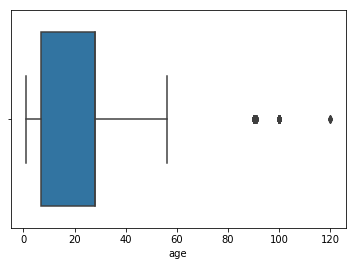

In [31]:
#To check the presence of outliers in 'age' post removing outliers
sns.boxplot(CompressiveStrength_NoOutliers['age'])

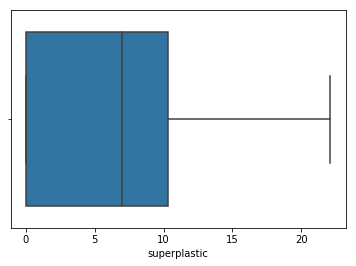

In [32]:
#To check the presence of outliers in 'superplastic' post removing outliers
sns.boxplot(CompressiveStrength_NoOutliers['superplastic'])

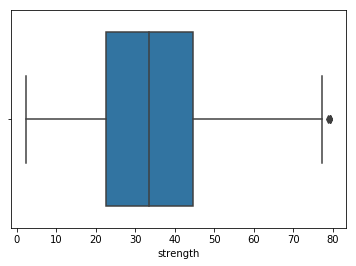

In [33]:
#To check the presence of outliers in 'strength' post removing outliers
sns.boxplot(CompressiveStrength_NoOutliers['strength'])

## Bivariate Analysis post outlier removal

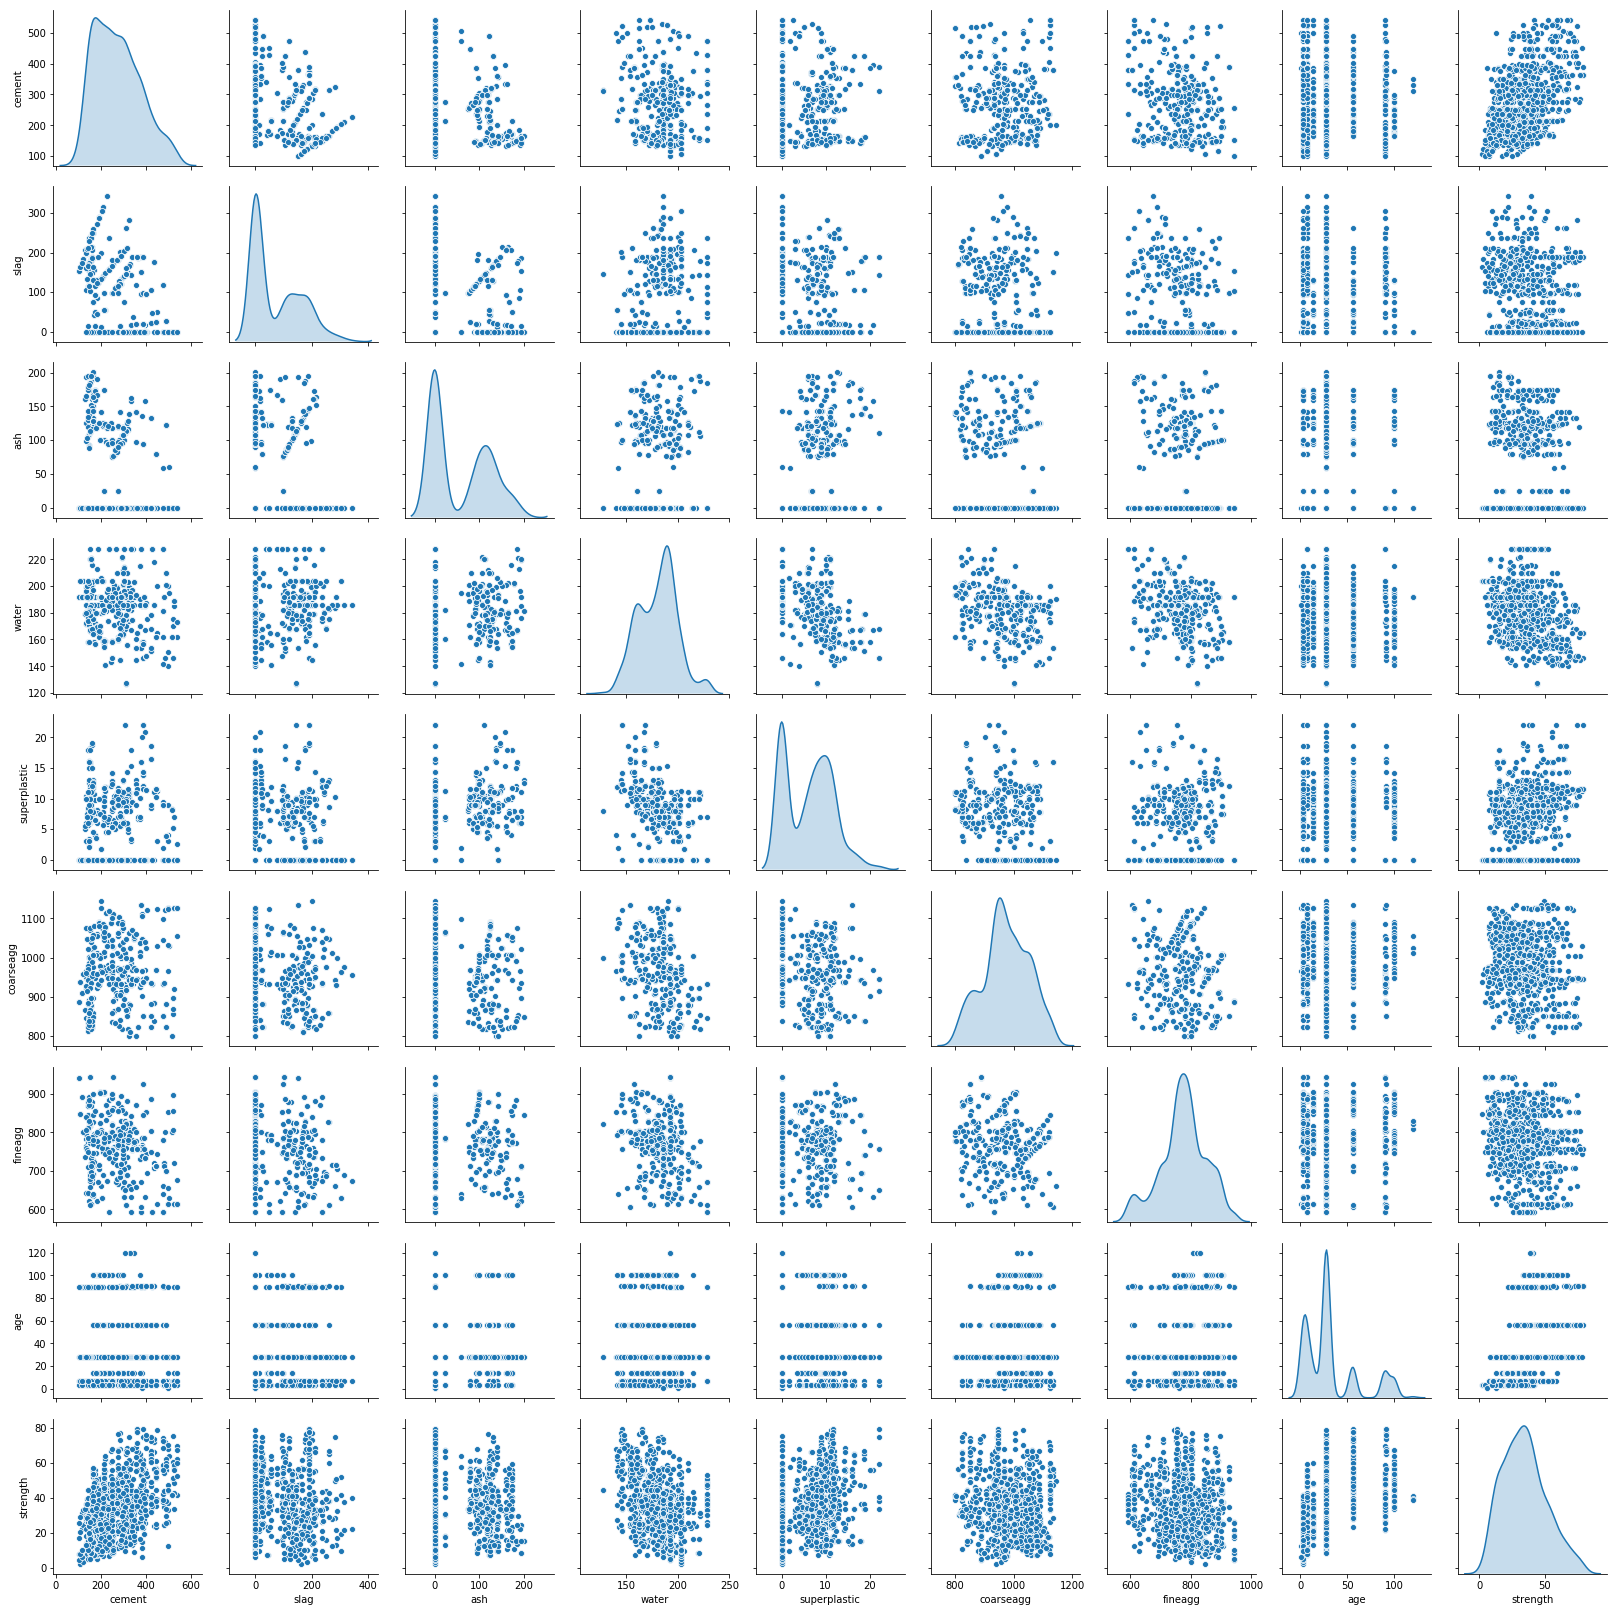

In [34]:
#Data Distribution across columns
sns.pairplot(CompressiveStrength_NoOutliers, diag_kind='kde')

## Observations post Outlier removal

1. Since the data is likely to have a mix of gaussians or clusters, it would be better to segregate them as clusters and then apply the machine learning algorithms

In [35]:
#Target Column dataframe
CompressiveStrength_NoOutliers_Target = CompressiveStrength_NoOutliers["strength"]

In [36]:
#Dropping 'strength' column from Independent dataframe
CompressiveStrength_NoOutliers_Independent = CompressiveStrength_NoOutliers.drop(labels = "strength", axis = 1)

In [37]:
#Shape of the dataframe
print(CompressiveStrength_NoOutliers_Independent.shape)
print(CompressiveStrength_NoOutliers_Target.shape)
print(CompressiveStrength_NoOutliers.shape)

(941, 8)
(941,)
(941, 9)


## Deliverable 2: Feature Engineering

## 1. Exploring for mix of gaussians

In [38]:
#Normalizing/Standardizing the dataframe
CompressiveStrength_NoOutliers_Independent_z = CompressiveStrength_NoOutliers_Independent.apply(zscore)

In [39]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(CompressiveStrength_NoOutliers_Independent_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,7528.000000
1,2,6062.005192
2,3,5221.087806
3,4,4493.479881
4,5,4024.371657
5,6,3712.930419
6,7,3471.247799
7,8,3253.247123
8,9,3114.502747
9,10,2921.743807


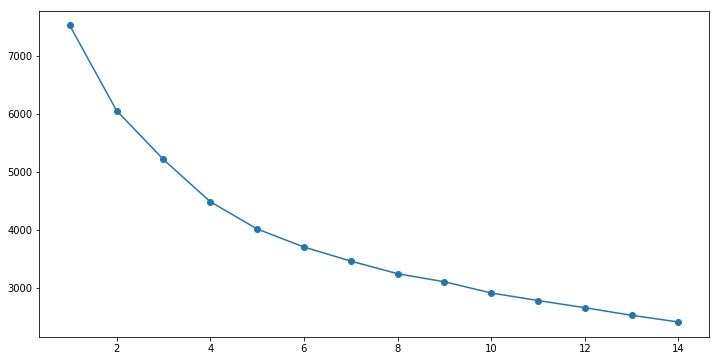

In [40]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [41]:
#Selecting the number of clusters as 6 since the slope from 6 is minimal
kmeans = KMeans(n_clusters= 6)
kmeans.fit(CompressiveStrength_NoOutliers_Independent_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[153 139 174  93 211 171]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22baa710>,
      dtype=object)

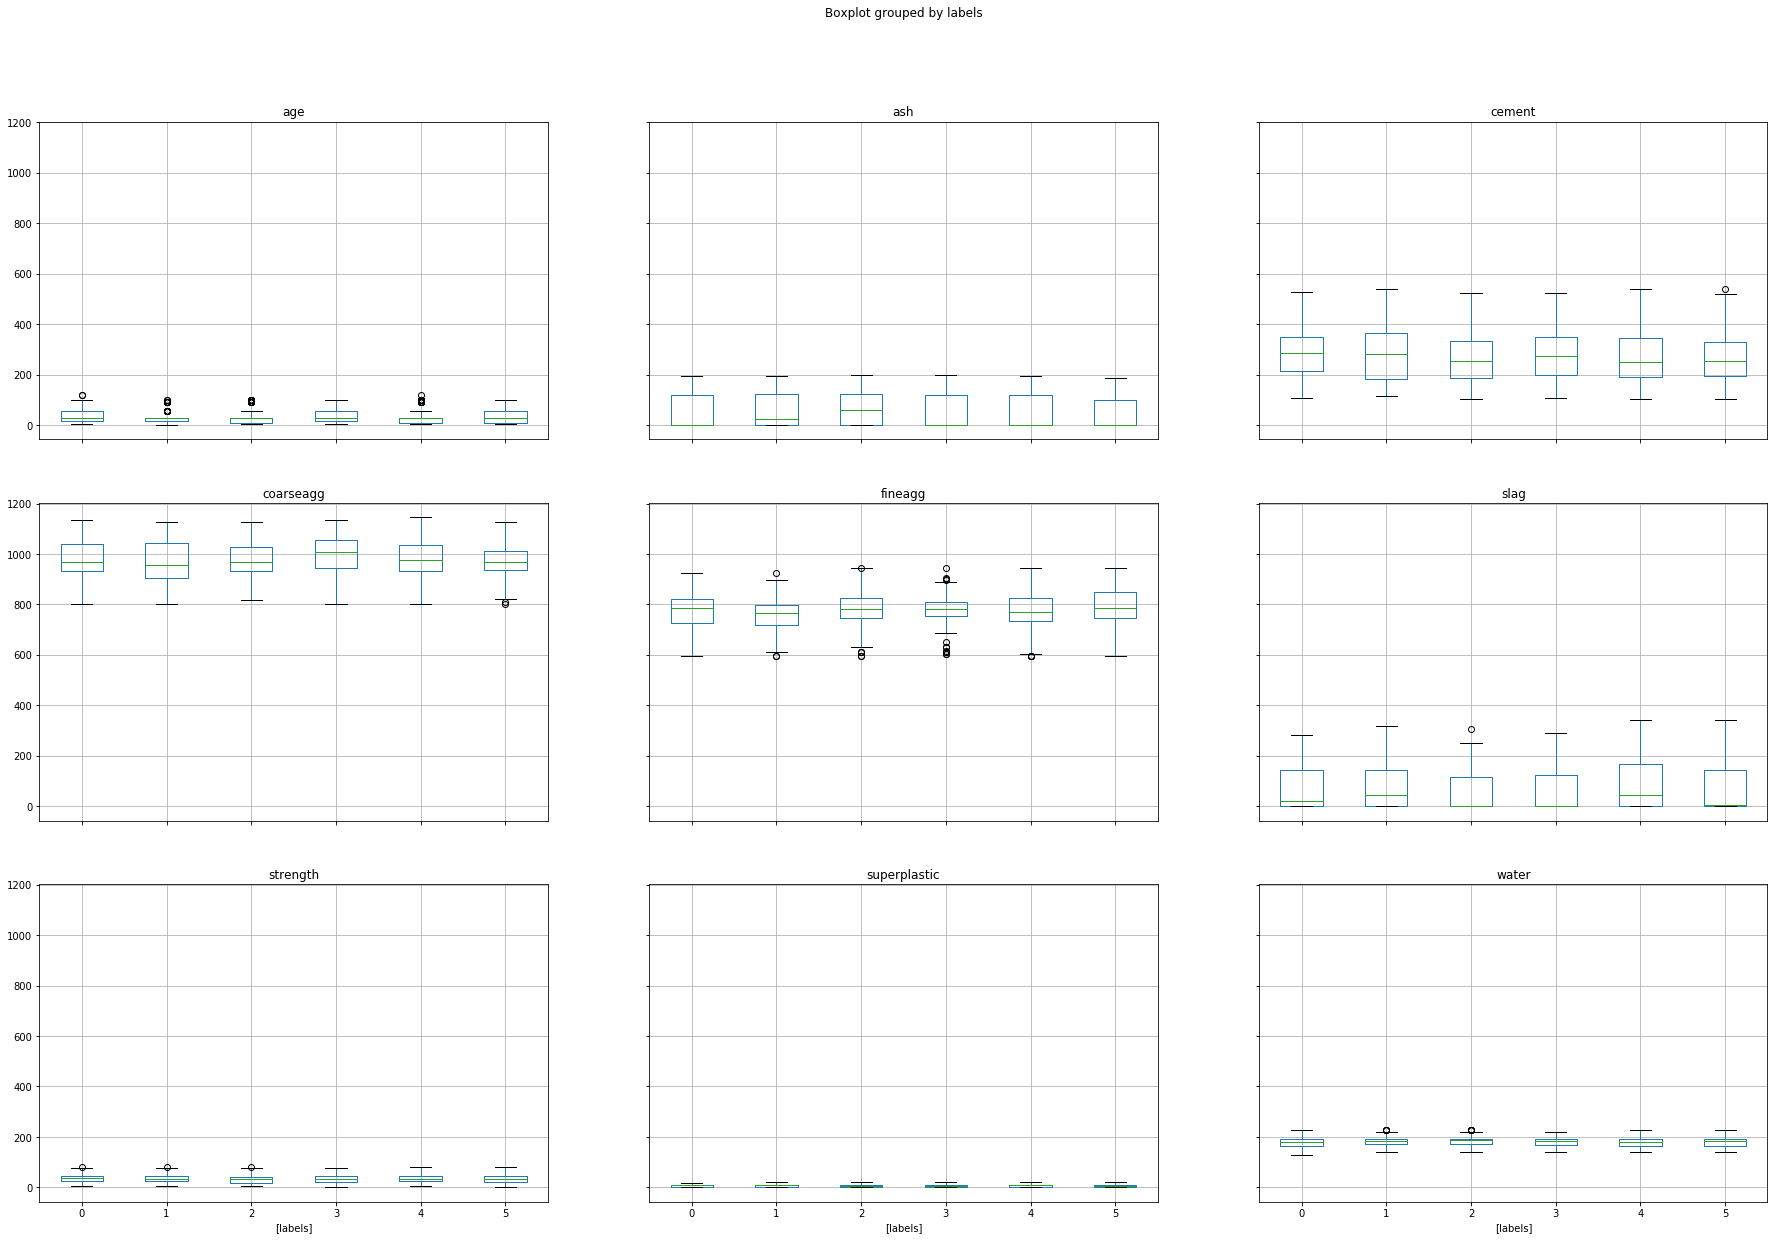

In [43]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
CompressiveStrength_NoOutliers_labeled = CompressiveStrength_NoOutliers.join(cluster_labels)
CompressiveStrength_NoOutliers_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))

In [44]:
#Shape of the Labeled dataframe
CompressiveStrength_NoOutliers_labeled.shape

(941, 10)

In [45]:
#Head of the newly created dataframe
CompressiveStrength_NoOutliers_labeled.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,labels
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,5
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,4
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,4
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,5
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,5


In [46]:
#Data types of the newly created dataframe
CompressiveStrength_NoOutliers_labeled.dtypes

cement           float64
slag             float64
ash              float64
water            float64
superplastic     float64
coarseagg        float64
fineagg          float64
age                int64
strength         float64
labels          category
dtype: object

In [47]:
#Checking the value of counts
CompressiveStrength_NoOutliers_labeled['labels'].value_counts()

4    199
2    163
5    156
0    138
1    124
3     84
Name: labels, dtype: int64

In [48]:
#One hot encoding for the newly formed clusters
oneHotCols=["labels"]
CompressiveStrength_NoOutliers_labeled=pd.get_dummies(CompressiveStrength_NoOutliers_labeled, columns=oneHotCols)

In [49]:
#Data types of the newly created dataframe
CompressiveStrength_NoOutliers_labeled.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
labels_0          uint8
labels_1          uint8
labels_2          uint8
labels_3          uint8
labels_4          uint8
labels_5          uint8
dtype: object

## 2. Feature Engineering Using PCA

In [50]:
CompressiveStrength_NoOutliers_Independent_z.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.320436,1.600464,-0.901915,1.221086,-1.170347,-0.038764,-0.373850,-0.153317
1,-1.049407,-0.366817,1.030317,-1.190996,0.852855,1.365779,0.261853,-0.643796
2,-0.253012,-0.855740,0.585732,0.361916,-0.140012,-0.230761,1.128113,-0.153317
3,-0.095894,0.465049,-0.901915,2.528520,-1.170347,-0.551615,-1.420026,-0.153317
4,-1.187867,1.269108,-0.901915,0.676767,0.534388,0.935396,-1.064193,-0.153317


In [51]:
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

In [52]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00106383 -0.26322907 -0.37436542 -0.08873326  0.03203483 -0.09957757
  -0.23985781 -0.03632767]
 [-0.26322907  1.00106383 -0.35179617  0.11391092  0.04394143 -0.29038223
  -0.29561169 -0.03682002]
 [-0.37436542 -0.35179617  1.00106383 -0.2506824   0.45445499 -0.03850406
   0.0642216   0.05486996]
 [-0.08873326  0.11391092 -0.2506824   1.00106383 -0.64186961 -0.20861487
  -0.36453226 -0.0222316 ]
 [ 0.03203483  0.04394143  0.45445499 -0.64186961  1.00106383 -0.22485461
   0.11438704  0.0455773 ]
 [-0.09957757 -0.29038223 -0.03850406 -0.20861487 -0.22485461  1.00106383
  -0.18000045  0.02184114]
 [-0.23985781 -0.29561169  0.0642216  -0.36453226  0.11438704 -0.18000045
   1.00106383  0.04579221]
 [-0.03632767 -0.03682002  0.05486996 -0.0222316   0.0455773   0.02184114
   0.04579221  1.00106383]]


In [53]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.1199892   0.44517951  0.1739788   0.30212448  0.77519737 -0.20739608
  -0.12849447 -0.07358704]
 [-0.24972449  0.45359035  0.22694518 -0.66352786  0.04125349  0.41667742
  -0.01725756  0.25396928]
 [ 0.47579178  0.38991989  0.38881186 -0.04353483 -0.33662277 -0.53950166
   0.02640863  0.25187371]
 [-0.53847293  0.36173939 -0.50779592 -0.07795533 -0.29191009 -0.45638187
  -0.06271485 -0.13352421]
 [ 0.52658083  0.05716553 -0.6767997  -0.30154014  0.32229986 -0.04437449
  -0.04616325  0.24996619]
 [-0.00112232  0.36570511 -0.21129131  0.6067969  -0.23061065  0.42557241
   0.06509844  0.46355266]
 [ 0.3506466   0.41959238 -0.07644982  0.01743697 -0.14903432  0.30202718
   0.1093265  -0.75462351]
 [ 0.08165586 -0.01059241  0.02548483  0.03234631 -0.13989674  0.09858474
  -0.97991818 -0.0446617 ]]

 Eigen Values 
%s [2.12362978 0.02996914 0.17643518 1.40630865 1.2786455  0.93856755
 0.98833751 1.06661732]


In [54]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(2.1236297809128866, array([-0.1199892 , -0.24972449,  0.47579178, -0.53847293,  0.52658083,
       -0.00112232,  0.3506466 ,  0.08165586])), (1.4063086501074613, array([ 0.30212448, -0.66352786, -0.04353483, -0.07795533, -0.30154014,
        0.6067969 ,  0.01743697,  0.03234631])), (1.2786454985213034, array([ 0.77519737,  0.04125349, -0.33662277, -0.29191009,  0.32229986,
       -0.23061065, -0.14903432, -0.13989674])), (1.0666173161462622, array([-0.07358704,  0.25396928,  0.25187371, -0.13352421,  0.24996619,
        0.46355266, -0.75462351, -0.0446617 ])), (0.988337512279616, array([-0.12849447, -0.01725756,  0.02640863, -0.06271485, -0.04616325,
        0.06509844,  0.1093265 , -0.97991818])), (0.9385675544265994, array([-0.20739608,  0.41667742, -0.53950166, -0.45638187, -0.04437449,
        0.42557241,  0.30202718,  0.09858474])), (0.17643518462008861, array([ 0.1739788 ,  0.22694518,  0.38881186, -0.50779592, -0.6767997 ,
       -0.21129131, -0.07644982,  0.02548483])), (0.02

In [55]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.26517163 0.4407734  0.60043423 0.73361971 0.85703061 0.97422688
 0.99625784 1.        ]


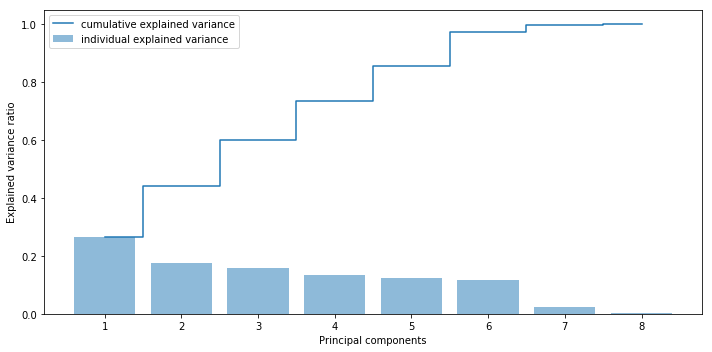

In [56]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [57]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:6])   
X_std_6D = np.dot(X,P_reduce.T) 
Proj_data_df = pd.DataFrame(X_std_6D) 

In [58]:
X_std_6D.shape

(941, 6)

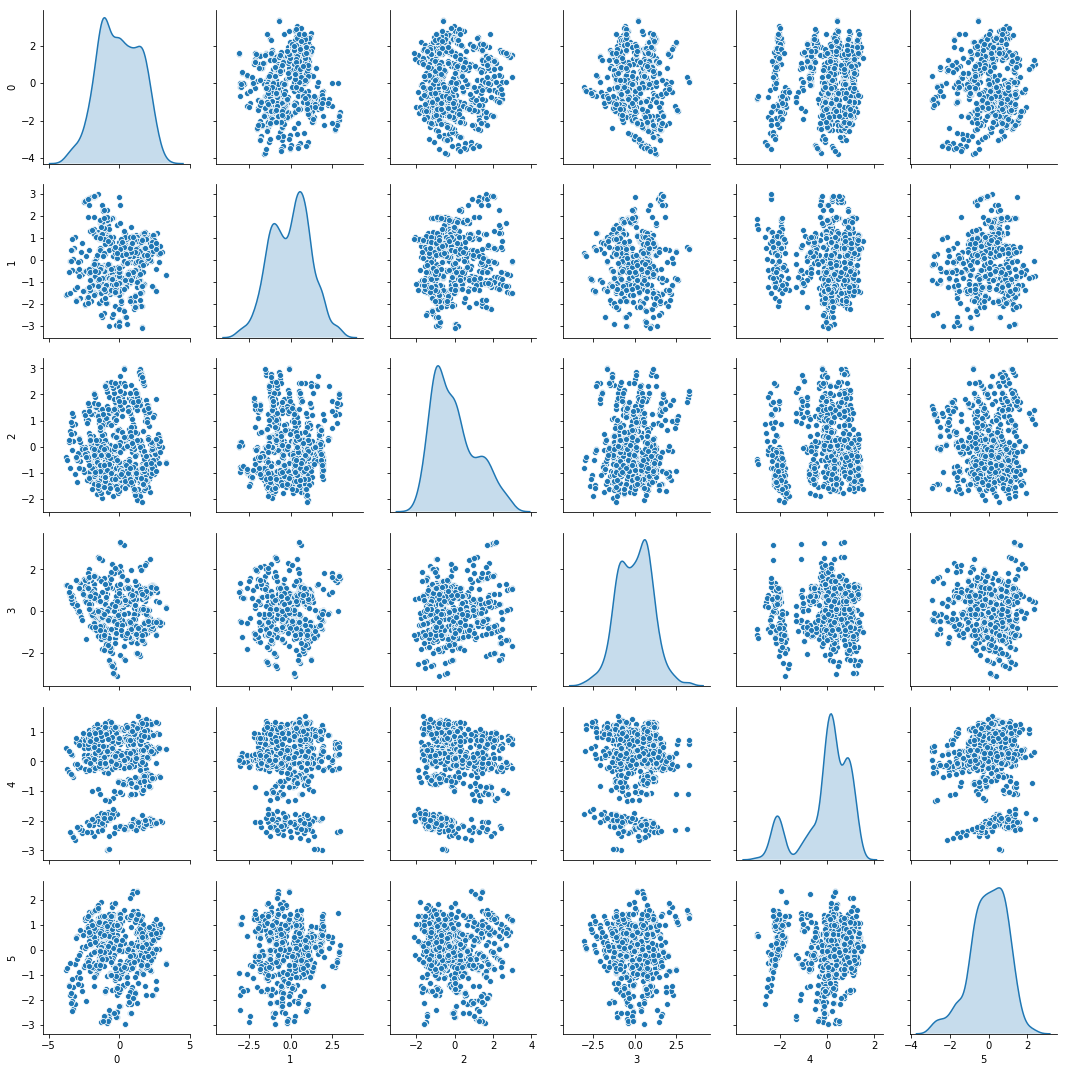

In [59]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

## Deliverable 3 : Creating the model

## 1. Model from PCA

In [60]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train_pca, X_test_pca, y_train, y_test = model_selection.train_test_split(X_std_6D, y, test_size=test_size, random_state=seed)


### 1.1 Applying Linear Regression

In [61]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = linearRegression.predict(X_test_pca)
model_score = linearRegression.score(X_test_pca, y_test)
model_score_train = linearRegression.score(X_train_pca, y_train)
print("Test Set model score ",model_score)
print("Training set model score ", model_score_train)

Test Set model score  0.716344558303163
Training set model score  0.7471013796355325


### 1.2  Applying SVM for Regression

In [63]:
clr = svm.SVR()  
clr.fit(X_train_pca , y_train)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
y_pred = clr.predict(X_test_pca)
model_score = clr.score(X_test_pca, y_test)
model_score_train = clr.score(X_train_pca, y_train)
print("Test Set Model score ",model_score)
print("Training set model score ", model_score_train)

Test Set Model score  0.646622636887553
Training set model score  0.7201940484123397


### 1.3 Applying DecisionTree Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics


#### 1.3.1 GradientBoostingRegressor

In [66]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train_pca, y_train)
print("gbmTree on training" , gbmTree.score(X_train_pca, y_train))
print("gbmTree on test data ",gbmTree.score(X_test_pca,y_test))


gbmTree on training 0.8997960183124363
gbmTree on test data  0.8117817166045147


#### 1.3.1 BaggingRegressor

In [67]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train_pca, y_train)
print("bgcl on train data ", bgcl.score(X_train_pca, y_train))
print("bgcl on test data ", bgcl.score(X_test_pca, y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9815847298652525
bgcl on test data  0.8453386321031875
out of bag score 0.8662588913071239


#### 1.3.3 RandomForestRegressor

In [68]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train_pca,y_train)
print("rfTree on train data ", rfTree.score(X_train_pca,y_train))
print("rfTree on test data ", rfTree.score(X_test_pca,y_test))

rfTree on train data  0.9820366564876362
rfTree on test data  0.847663176537621


## 2. Model from Exploring of mix of gaussians

In [69]:
CompressiveStrength_NoOutliers_labeled.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,labels_0,labels_1,labels_2,labels_3,labels_4,labels_5
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0,0,0,0,0,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0,0,0,0,1,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0,0,0,0,1,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0,0,0,0,0,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0,0,0,0,0,1


In [70]:
#Dataframe for Target column
CompressiveStrength_NoOutliers_labeled_Target = CompressiveStrength_NoOutliers_labeled['strength']

In [71]:
#Dataframe for Independent Columns
CompressiveStrength_NoOutliers_labeled_Independent = CompressiveStrength_NoOutliers_labeled.drop(labels = "strength", axis = 1)

In [72]:
#Normalizing the data set
CompressiveStrength_NoOutliers_labeled_Independent_z = CompressiveStrength_NoOutliers_labeled_Independent.apply(zscore)

In [73]:
#Creating Train and Test set from the given dataset
X = np.array(CompressiveStrength_NoOutliers_labeled_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_labeled_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### 2.1 Applying Linear Regression 

In [74]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred = linearRegression.predict(X_test)
model_score = linearRegression.score(X_test, y_test)
model_score_train = linearRegression.score(X_train, y_train)
print("Test Set model score ",model_score)
print("Training set model score ", model_score_train)

Test Set model score  0.7567129187263063
Training set model score  0.774601438528753


### 2.2 Applying SVM for Regression

In [76]:
clr = svm.SVR()  
clr.fit(X_train , y_train)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
y_pred = clr.predict(X_test)
model_score = clr.score(X_test, y_test)
model_score_train = clr.score(X_train, y_train)
print("Test Set Model score ",model_score)
print("Training set model score ", model_score_train)

Test Set Model score  0.5740683645305097
Training set model score  0.6496395965969856


### 2.3 Applying DecisionTree Regressor

#### 2.3.1 GradientBoostingRegressor

In [78]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train, y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test, y_test))

gbmTree on training 0.9285123214064483
gbmTree on test data  0.8441924594169643


#### 2.3.2 BaggingRegressor

In [79]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train, y_train)
print("bgcl on train data ", bgcl.score(X_train, y_train))
print("bgcl on test data ", bgcl.score(X_test, y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9860165620563789
bgcl on test data  0.8752907282330255
out of bag score 0.903457041327578


#### 2.3.3 RandomForestRegressor

In [80]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train, y_train)
print("rfTree on train data ", rfTree.score(X_train, y_train))
print("rfTree on test data ", rfTree.score(X_test, y_test))

rfTree on train data  0.9854872662270415
rfTree on test data  0.8759811898437901


## 3. Model from Dataframe post removing Outliers

In [81]:
CompressiveStrength_NoOutliers.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [82]:
CompressiveStrength_NoOutliers_Independent.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [83]:
CompressiveStrength_NoOutliers_Target.head(5)

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [84]:
CompressiveStrength_NoOutliers_Independent_z.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.320436,1.600464,-0.901915,1.221086,-1.170347,-0.038764,-0.373850,-0.153317
1,-1.049407,-0.366817,1.030317,-1.190996,0.852855,1.365779,0.261853,-0.643796
2,-0.253012,-0.855740,0.585732,0.361916,-0.140012,-0.230761,1.128113,-0.153317
3,-0.095894,0.465049,-0.901915,2.528520,-1.170347,-0.551615,-1.420026,-0.153317
4,-1.187867,1.269108,-0.901915,0.676767,0.534388,0.935396,-1.064193,-0.153317


In [85]:
#Creating Train and Test set from the given dataset
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### 3.1 Applying Linear Regression

In [86]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_pred = linearRegression.predict(X_test)
model_score = linearRegression.score(X_test, y_test)
model_score_train = linearRegression.score(X_train, y_train)
print("Test Set model score ",model_score)
print("Training set model score ", model_score_train)

Test Set model score  0.759214758129655
Training set model score  0.7733935412988981


### 3.2 Applying SVM for Regression 

In [88]:
clr = svm.SVR()  
clr.fit(X_train , y_train)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
y_pred = clr.predict(X_test)
model_score = clr.score(X_test, y_test)
model_score_train = clr.score(X_train, y_train)
print("Test Set Model score ",model_score)
print("Training set model score ", model_score_train)

Test Set Model score  0.6883474552562472
Training set model score  0.7509449844024649


### 3.3 Applying DecisionTreeRegressor

#### 3.3.1 GradientBoostingRegressor

In [90]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train, y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test, y_test))

gbmTree on training 0.9280373225466939
gbmTree on test data  0.8473463498322201


#### 3.3.2 BaggingRegressor

In [91]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train, y_train)
print("bgcl on train data ", bgcl.score(X_train, y_train))
print("bgcl on test data ", bgcl.score(X_test, y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9875500397132311
bgcl on test data  0.8807911118826781
out of bag score 0.9108817916717977


#### 3.3.3 RandomForestRegressor

In [92]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train, y_train)
print("rfTree on train data ", rfTree.score(X_train, y_train))
print("rfTree on test data ", rfTree.score(X_test, y_test))

rfTree on train data  0.9872777714710834
rfTree on test data  0.868932250105841


## Observations from the initial Model Building 

1. Models were created for 3 types of dataframe post removing outliers with segregating data points under 6 clusters, with Principal Component Analysis and with the plain dataframe with outliers removed
2. Models for 3 types of dataframe are created against 3 algorithms such as Linear Regression, SVM for Regression and DecisionTreeRegressor 
3. Models built using Machine learning algorithms were plain models without any hyper parameters
4. Out of 3 algorithms used, SVM for Regression performed poorly when compared to Linear regression and DecisionTree Regressor
5. DecisionTreeRegressor machine learning algorithm performs better when compared to the rest of the machine learning algorithms

## Deliverable 4:: Tuning the model

## 4.1 Tuning Linear Regression Model with Ridge and Lasso and Polynomial Features

In [93]:
#Creating Train and Test set from the given dataset
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [94]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred = linearRegression.predict(X_test)
model_score = linearRegression.score(X_test, y_test)
model_score_train = linearRegression.score(X_train, y_train)
print("Test Set model score ",model_score)
print("Training set model score ", model_score_train)

Test Set model score  0.759214758129655
Training set model score  0.7733935412988981


In [96]:
#Getting the linear regression coefficients
print("The coefficient for is {} ".format(linearRegression.coef_))

The coefficient for is [10.311638    6.53237561  2.99550964 -4.27593583  1.84055267 -0.34576222
 -0.54893892  8.75232443] 


In [97]:
#Getting the linear regression intercept
intercept = linearRegression.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 34.76696031647805


### 4.1.1 Applying Ridge & Lasso

In [98]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [10.26091187  6.48088472  2.95073756 -4.30416719  1.84297458 -0.38001632
 -0.58964138  8.7490901 ]


In [99]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 9.85207918  6.05018821  2.48920337 -4.21121729  2.05211171 -0.41225199
 -0.67212899  8.65061771]


In [100]:
print("Training Set Model score ",ridge.score(X_train, y_train))
print("Test Set Model score ",ridge.score(X_test, y_test))

Training Set Model score  0.7733921061203903
Test Set Model score  0.7591789474555132


In [101]:
print("Training Set Model score ",lasso.score(X_train, y_train))
print("Test Set Model score ",lasso.score(X_test, y_test))

Training Set Model score  0.7729423887614386
Test Set Model score  0.757069805424561


### 4.1.2 Generating polynomial models and reapplying Ridge and Lasso

In [102]:
from sklearn.preprocessing import PolynomialFeatures
#Creating Train and Test set from the given dataset
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(658, 93)

In [103]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
print(linearRegression.coef_)

[-6.18785546e-16  1.23755711e+01  7.42482592e+00  2.64957511e+00
 -4.32783276e+00  9.75561512e-02  1.46378747e-01  1.39262002e+00
  9.08150677e+00 -2.22110786e-01  1.36614707e+00 -6.70387872e-01
  1.31356812e+00 -1.48983005e-01  2.18531364e+00  1.35724676e+00
  3.00621117e+00 -3.39284958e+00 -3.01699005e+00 -3.48837412e+00
  8.08388918e-02  2.74780216e+00 -3.75996691e+00 -6.26760750e+00
 -2.17853523e+00 -2.79210875e-01  2.76832842e+00  9.53091364e-01
 -2.55542933e+00 -2.96854328e-02 -2.11972088e+00  1.47568432e+00
  1.72639900e+00 -1.61072430e+00 -2.74904559e-01 -3.30950436e-01
  4.83004270e-02  1.23427906e-01 -7.23604034e-01 -8.64016890e-01
 -2.17290747e+00 -1.48769575e-01  4.44278197e-01  8.43875639e-01
 -1.75220562e+00 -8.73900270e-01  2.67785190e-01  2.22056183e+00
  2.06009320e+00  2.11653308e+00  6.81373012e-01 -7.38837933e-02
  1.93325423e+00  1.35555541e+00 -2.26401641e-01  1.63085153e-01
 -5.95100200e-01  3.04939657e-02 -9.60987032e-01 -4.42552899e+00
  1.86215409e-01  1.37039

In [104]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  1.20329981e+01  7.11146096e+00  2.37871844e+00
 -4.39962987e+00  3.38324543e-01 -5.94723332e-02  1.13957213e+00
  9.09596541e+00 -3.08194355e-01  1.24353231e+00 -6.40733330e-01
  1.42165277e+00 -1.79645907e-01  2.13389486e+00  1.21693754e+00
  2.77611454e+00 -3.31258899e+00 -2.74704805e+00 -3.47527189e+00
  9.36979244e-02  2.60054510e+00 -3.66167728e+00 -5.99440145e+00
 -2.19424802e+00 -2.93010226e-01  2.62490163e+00  9.76798272e-01
 -2.50464082e+00 -1.23176410e-02 -2.15648553e+00  1.55684258e+00
  1.80911613e+00 -1.53319955e+00 -2.47785885e-01 -4.27459617e-01
 -5.76191027e-02  5.08929316e-04 -7.21951165e-01 -7.93192841e-01
 -2.23657020e+00 -1.93630746e-01  4.02098030e-01  8.71627155e-01
 -1.58082437e+00 -8.96094593e-01  2.06548683e-01  2.19436622e+00
  2.03376606e+00  2.09439919e+00  6.77351842e-01 -1.15557933e-01
  1.93942219e+00  1.38198949e+00 -3.45951083e-01  1.50484652e-01
 -6.01284103e-01  3.05075571e-02 -9.58875224e-01 -4.19954289e+00
  1.35880403

In [105]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          9.73295565  5.63243714  1.20481799 -4.31458659  2.44154701
 -0.91608656 -0.70533736  9.23416992 -0.          0.         -0.
  0.03544525  0.3309832   1.13938898  0.          0.          0.
 -0.         -0.9874989   1.14396637  0.70806294 -1.63312255 -3.11575661
 -0.8385218   0.          0.44317089  0.         -1.82305636 -0.11062822
 -1.40179491  0.15881601  0.11509606  0.          0.27174289 -0.79398799
 -0.67244261 -0.8360397   0.         -0.15931961 -0.96589358 -0.
 -0.          0.26079804  0.59227272 -0.10984412  0.          0.99598613
  1.30077084 -0.          0.         -0.          0.          0.
 -0.71500086 -0.         -0.23461743  0.09235541 -0.         -0.
  0.          0.16106392 -1.10232507 -0.          0.          0.67304349
 -0.43839094  0.          0.          0.          0.24606147  0.2059912
  0.28590544 -0.          0.18534413 -0.1242825   0.         -0.54259099
 -0.20787569  0.57709074 -1.11759127 -0.44566957 -0.          0.
  0.15854183 -

In [106]:
y_pred = linearRegression.predict(X_test)
model_score = linearRegression.score(X_test, y_test)
model_score_train = linearRegression.score(X_train, y_train)
print("Test Set model score ",model_score)
print("Training set model score ", model_score_train)

Test Set model score  0.7657743154283708
Training set model score  0.8626515993986011


In [107]:
print("Training Set Model score ",ridge.score(X_train, y_train))
print("Test Set Model score ",ridge.score(X_test, y_test))

Training Set Model score  0.8626270878667992
Test Set Model score  0.7673443947781297


In [108]:
print("Training Set Model score ",lasso.score(X_train, y_train))
print("Test Set Model score ",lasso.score(X_test, y_test))

Training Set Model score  0.8451067134510236
Test Set Model score  0.7952598221729986


## Observations post applying Ridge and Lasso

1. Ridge and Lasso regularization methods were applied on the dataframe since there were multiple peaks and valleys observed
2. Multiple values were tried for polynomial features on trial and error basis and it is understood that the polynomial feature's value of 3 delivered better results
3. Value of polynomial features of 10 resulted in degraded performance
4. Model scores improved for Ridge and Lasso post applying polynomial features upto 79% however, it is is very less when compared to DecisionTreeRegressor Algorithms

## 4.2 Tuning Decision Tree Regressor model with hyper parameters

1. Out of all the DecisionTreeRegressor models such as GradientBoosting, Bagging, RandomForestRegressor, RandomForestRegressor has the higher model score and hence this algorithm will be tweaked with the hyperparameters to achieve an increase in the model score

### 4.2.1 Hyper Parameter Tuning using RandomSearchCV

In [109]:
from pprint import pprint
rf = RandomForestRegressor(random_state = 1)

In [110]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [111]:
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 80, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 80]}


In [113]:
# Use the random grid to search for best hyperparameters
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.6s finished


In [114]:
#Selecting the best random combination of the hyper parameters
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [115]:
#RandomForestRegressor model score for the selected combination
best_random = rf_random.best_estimator_
best_random.score(X_test , y_test)

0.8751960976005295

### 4.2.2 Hyper Parameter Tuning using GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [118]:
rf = RandomForestRegressor(random_state = 1)

In [119]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [120]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [121]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 7}

In [122]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.7743029919941562

## Observations from model tuning using hyper parameters

1. RandomSearchCV and GridSearchCV Hyper parameter tuning models were used.
2. Model scores observed using RandomSearchCV is higher than that of GridSearchCV
3. Able to get the optimal hyper parameter set in both RandomSearchCV and GridSearchCV

## 4.3 Tuning the Model Performance Range at 95%

In [123]:
#Creating Train and Test set from the given dataset
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [124]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

gbmTree on training 0.9280373225466939
gbmTree on test data  0.847120915695079


In [125]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9873344598100963
bgcl on test data  0.8747527370968462
out of bag score 0.908571474697327


In [126]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test,y_test))

rfTree on train data  0.9871067860847419
rfTree on test data  0.8758893622503902


### 4.3.1 KFold Cross Validation

In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
rfTree = RandomForestRegressor(n_estimators=50)
results = cross_val_score(rfTree, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.80132379 0.91600682 0.6961271  0.8352377  0.93697003 0.82988369
 0.85049166 0.90799009 0.9570594  0.97009319 0.91176451 0.98448064
 0.94392401 0.94249065 0.8950278  0.82403163 0.87334353 0.95466931
 0.92405239 0.93570632 0.96648083 0.89158034 0.93727765 0.92403168
 0.63170789 0.96117207 0.91384842 0.93980266 0.9280544  0.94358591
 0.90002243 0.92890979 0.9259954  0.95231241 0.87973542 0.94285741
 0.86562132 0.95087997 0.89942702 0.82982502 0.89712436 0.9583635
 0.93954989 0.96492109 0.90310845 0.89670795 0.91057699 0.96070451
 0.95896792 0.92520467]
Accuracy: 90.638% (6.512%)


### 4.3.2 Bootstrap Sampling

In [168]:
CompressiveStrength_XY = CompressiveStrength_NoOutliers_Independent_z.join(CompressiveStrength_NoOutliers_Target)

In [169]:
CompressiveStrength_XY.shape

(941, 9)

In [170]:
CompressiveStrength_XY.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.320436,1.600464,-0.901915,1.221086,-1.170347,-0.038764,-0.373850,-0.153317,29.89
1,-1.049407,-0.366817,1.030317,-1.190996,0.852855,1.365779,0.261853,-0.643796,23.51
2,-0.253012,-0.855740,0.585732,0.361916,-0.140012,-0.230761,1.128113,-0.153317,29.22
3,-0.095894,0.465049,-0.901915,2.528520,-1.170347,-0.551615,-1.420026,-0.153317,45.85
4,-1.187867,1.269108,-0.901915,0.676767,0.534388,0.935396,-1.064193,-0.153317,18.29


In [171]:
print(len(CompressiveStrength_XY.values))

941


In [172]:
CompressiveStrength_NoOutliers.shape

(941, 9)

In [173]:
CompressiveStrength_NoOutliers_z = CompressiveStrength_NoOutliers.apply(zscore)

In [174]:
print(CompressiveStrength_XY.values)

[[-1.32043596e+00  1.60046428e+00 -9.01915191e-01 ... -3.73849673e-01
  -1.53316652e-01  2.98900000e+01]
 [-1.04940659e+00 -3.66816543e-01  1.03031679e+00 ...  2.61852543e-01
  -6.43795908e-01  2.35100000e+01]
 [-2.53012301e-01 -8.55740282e-01  5.85732437e-01 ...  1.12811342e+00
  -1.53316652e-01  2.92200000e+01]
 ...
 [-1.38230136e+00 -8.55740282e-01  1.67853942e+00 ...  3.79130940e-01
  -1.53316652e-01  1.32900000e+01]
 [ 6.23318722e-03  4.88220707e-01  5.01789938e-01 ... -1.09973281e-01
  -1.53316652e-01  4.42800000e+01]
 [ 2.59476011e+00 -8.55740282e-01 -9.01915191e-01 ... -2.17967043e+00
  -8.89035536e-01  5.26100000e+01]]


In [177]:
# configure bootstrap



values = CompressiveStrength_XY.values

n_iterations = 1000             # Number of bootstrap samples to create
n_size = int(len(CompressiveStrength_NoOutliers_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(n_estimators=50)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test)

	stats.append(score)
	print(score)

0.8864395426140148
0.862080546596985
0.8772651826363417
0.8885767836993832
0.8789288092634426
0.8648806800827776
0.8822650245598901
0.881129826604489
0.878233695164262
0.9008157822767876
0.878512973342645
0.8795245714361039
0.8974456864193042
0.8823856658753764
0.8644395682155608
0.8978550375301625
0.8878893777336507
0.8740122073808788
0.8557218860836109
0.8658032729288045
0.9047857601372958
0.8640735830553761
0.8961902145637158
0.8801978963393815
0.8713851464376307
0.8510669064696588
0.9000240746116897
0.8816065064809644
0.8658575180959569
0.8686324710876605
0.8805143182768307
0.8734071902530698
0.8832574754848717
0.8849193250118226
0.8726230225890993
0.8797019096053069
0.8841688774800869
0.8842158068699068
0.8885747432909731
0.8716082443965892
0.8915385056307517
0.8738776255636334
0.8836119516300844
0.9020373449547769
0.8759145447817698
0.9125824766339758
0.888761918209985
0.8777781966733709
0.8653167986439925
0.8768556606979583
0.8895648477506772
0.906165683692345
0.9105073392396801

0.890101197478095
0.8981147772210702
0.8463680966482169
0.8684547637791382
0.8824803496246759
0.8739303341830975
0.8994894747425832
0.8463742648840256
0.8898685172180711
0.859752830446075
0.8987506327991717
0.8579299076485682
0.8855669653647442
0.8426778865618991
0.8744385870337638
0.8847862647153175
0.8973838186045253
0.9082163236008948
0.8950334465416279
0.9031578287454355
0.8821074129996656
0.8948879519053448
0.902893206506069
0.9058473230999659
0.8927643189765047
0.8838772481442538
0.8558554131044513
0.8626171958599704
0.8727875385459213
0.864924695748266
0.852957849749995
0.8389924368774643
0.8860084146352353
0.8789865786552709
0.8793830062197048
0.8907953549244041
0.8786814444116767
0.8879413340711569
0.890171903469612
0.8939642512260898
0.9161842861614367
0.8974845378900975
0.8921529080941558
0.8781181079395481
0.8958396177768367
0.8557918536677194
0.8632595810534356
0.8700528284291745
0.8719447087668669
0.8553716493268562
0.8697232329094949
0.8745206909499366
0.8849893012967979

0.8743098876785076
0.8722474348295766
0.8698903938120937
0.899312611864674
0.8969249172246447
0.8881347606221651
0.8758428854937063
0.8731529815237428
0.8931210360952945
0.8668301603837827
0.8898824302706411
0.903832806986361
0.8750118812014346
0.870737294042064
0.8929325022119531
0.8763358238438975
0.8753500746355064
0.9021392966945955
0.9037269619015882
0.8809627551943915
0.8897297928929964
0.8560598028855526
0.877497062325259
0.8816180208657445
0.8564962285621008
0.8835035923745584
0.8875967099540419
0.8985329844116565
0.8443933786889625
0.9073569779210904
0.8771431349827696
0.8642133769045769
0.8713140892077754
0.8656297532352831
0.8870485814828888
0.8380562134314143
0.8606977243674167
0.8752590543999155
0.8782816376262575
0.8877092327068582
0.8622039142762148
0.8952134889272216
0.9002782451191591
0.8998680966469151
0.8977416013726451
0.8397675744983119
0.8865070530242711
0.8673677390126053
0.8928068330335984
0.8736182079902604
0.8554737584312772
0.9038391614345161
0.87228482108180

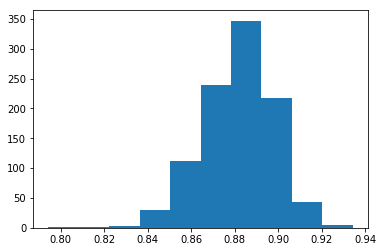

95.0 confidence interval 84.7% and 91.0%


In [178]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [155]:
# configure bootstrap


n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(CompressiveStrength_NoOutliers_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)
	print(score)

0.8345294793277811
0.8484648176896796
0.8604646463821644
0.8552392815121518
0.8710919470473917
0.8520495253683665
0.8519640529387222
0.8548471330579362
0.8626466690287804
0.8664356381339231
0.8622872897967998
0.8679049522484855
0.8364410835821704
0.8376766120934802
0.8325951012527426
0.874931428043016
0.8442978166272477
0.8540927756908242
0.8710021311568347
0.8492969123655766
0.8352760183621413
0.8668142895586733
0.841235141267826
0.8590934158309395
0.8487620334422992
0.8731354154998191
0.8440845289483794
0.8480340086997353
0.8500566035618862
0.8637704715296011
0.8709475851968093
0.8662744767060704
0.8780185301928161
0.872437426141194
0.8579938436167203
0.8500213396892197
0.8186149899531041
0.8637683393562835
0.8565007984416174
0.8717699295945585
0.8288512471843547
0.8641051296595983
0.8594422878264973
0.8507831669525696
0.8579379125471105
0.8660781811998944
0.8475189781185601
0.8695438527105582
0.8445716367994537
0.8600294442536786
0.8607367158711493
0.8799131242838222
0.8450088033056

0.8577288810289693
0.835876004853078
0.8516852944112351
0.8694792143341824
0.8530037711130053
0.8308561647530917
0.8626198623614321
0.8544762093047648
0.8609858220342087
0.8561953424047988
0.8501750384536275
0.8496480021092783
0.8535606197284923
0.8657457472977029
0.8533703985012143
0.8525628629344797
0.8142103277635041
0.8558102193039521
0.8349559992721041
0.8675168563843043
0.8357583227754221
0.8709991534125444
0.8512931714514986
0.8186406304435746
0.8665197412902554
0.8690737814846572
0.8687335171537987
0.8532817472880225
0.8669980354470536
0.8683068822389783
0.8732955550072767
0.8564877480335452
0.8398355913219848
0.8656416591847409
0.878754984670823
0.8576006535269116
0.8268415957304354
0.8806771432406305
0.840447165434658
0.8358012369923644
0.8884639714063504
0.8714527854771192
0.8525549475442913
0.8643720383272492
0.8185034210609252
0.877946520787403
0.8852794847364156
0.8498895811387752
0.8667781351157859
0.8480407089685038
0.8640258256852092
0.8462935933176413
0.86827598343640

0.8525216973538516
0.8689022216598827
0.8710536758632008
0.8294837698215112
0.8649308094360411
0.8819922198905739
0.8654333517656835
0.8503306143751619
0.8467600308345673
0.8676532134811116
0.8683625033435133
0.8414627911740779
0.8670660868473078
0.8473610908228367
0.8521696073321882
0.8521588270822631
0.8373130603362023
0.8527809443237329
0.8321721028059825
0.8509858257890046
0.8473920956740568
0.8768873146974633
0.8638317757034517
0.8479976057569638
0.8409980796471364
0.842545098014765
0.8526834696332731
0.8656055227604587
0.8574756274861391
0.8384237927686455
0.8643424725548048
0.8783364616659836
0.8582878664506505
0.8664202685897331
0.865691471450478
0.8669106087140134
0.8498897290452115
0.8381161064302158
0.8796297740438991
0.8475182121847852
0.8554572477503644
0.8776260373677863
0.8704323799786768
0.8580873152047419
0.8738314031161549
0.8450007937068216
0.8522708796888454
0.8529440777522821
0.8491836693699808
0.8465597777080826
0.8440847921383132
0.8604245875054811
0.869044506586

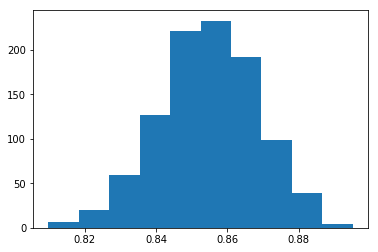

95.0 confidence interval 82.7% and 88.1%


In [156]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


## 4.4 Tuning the model with Dropping the features

In [157]:
X = np.array(CompressiveStrength_NoOutliers_Independent_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### 4.4.1 Identifying the feature Importance

In [158]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = CompressiveStrength_NoOutliers_Independent_z.columns[0:9]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.4664509  0.         0.         0.07356458 0.         0.
 0.         0.45998452]
Index(['cement', 'age', 'water', 'fineagg', 'coarseagg', 'superplastic', 'ash',
       'slag'],
      dtype='object') [0.4664509  0.         0.         0.07356458 0.         0.
 0.         0.45998452]


### Observations from feature Importance
1. feature_importances_ function is used to identify the importance of the columns present in the data set
2. From the result of the feature_importances_ function, it is understood that only 3 columns such as 'cement', 'water' and 'age' have relatively higher importance and the rest all columns have feature importance of 0.
3. Hence, the rest all columns will be dropped

In [164]:
#Retaining 'cement', 'water', 'age' columns in the dataframe
CompressiveStrength_NoOutliers_FeatureImportance_z = CompressiveStrength_NoOutliers_Independent_z.drop(['slag', 'ash', 'superplastic', 'coarseagg', 'fineagg' ] , axis=1)


In [165]:
X = np.array(CompressiveStrength_NoOutliers_FeatureImportance_z)
y = np.array(CompressiveStrength_NoOutliers_Target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [166]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train, y_train)
print("rfTree on train data ", rfTree.score(X_train, y_train))
print("rfTree on test data ", rfTree.score(X_test, y_test))

rfTree on train data  0.974742236384546
rfTree on test data  0.7848673795859417


In [167]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
rfTree = RandomForestRegressor(n_estimators=50)
results = cross_val_score(rfTree, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.39643646 0.56255768 0.65592866 0.6714506  0.88428139 0.58033811
 0.59787388 0.74504172 0.90532789 0.90788781 0.86497286 0.9461562
 0.8683402  0.85042285 0.84435617 0.78326919 0.58038685 0.82045778
 0.75744149 0.87183937 0.9656783  0.85334077 0.83399749 0.84408101
 0.63564834 0.92218995 0.86269307 0.73285759 0.7356013  0.86869379
 0.8416291  0.90772597 0.69210844 0.83036819 0.83446261 0.90668669
 0.78910417 0.83325377 0.85568461 0.57486636 0.77905071 0.91437153
 0.93637689 0.9620666  0.82132692 0.83907953 0.90392647 0.80882666
 0.90139607 0.81383391]
Accuracy: 80.191% (12.139%)


## Observations from all the four model tunings
1. The below 4 model tuning methods were developed for Deliverable 4

   1.1 Tuning Linear Regression model with Ridge and Lasso by increasing the number of columns using Polynomial Features
   
   1.2 Tuning RandomForestRegressor model for suitable Hyper parameters with RandomSearchCV and GridSearchCV 
   
   1.3 Tuning the model for 95% Confidence interval
   
   1.4 Tuning the model with dropping features based on feature_importance 
   
2. Optimal results for RandomForestRegressor algorithm with 95% confidence interval is between 84.7% - 91.0%

3. RandomForestRegressor model with RandomSearchCV performed much better than the GridSearchCV

4. RandomForestRegressor with KFold Cross Validation with 50 folds resulted in 90% accuracy

5. Linear Regression model post using Polynomial Features and Ridge and Lasso resulted in 79% accuracy

6. 95% Confidence interval for GradientBoostingRegressor resulted between 82.7% and 88.1%

7. Model score didnt improve when the features such as 'slag', 'ash', 'superplastic', 'coarseagg', 'fineagg' were dropped and the model score was 80.191%


## Conclusion
1. Model Performance Range at 95% confidence interval is between 84.7% and 91.0%